In [1]:
#Meaning of sentence is dependent on order of words

* Capturing pair of words instead of individual word such as bi-gram or tri-gram 
* Limitation of bag of n-grams model:
  - As n increased, dimesionality sparsity increases
  - Doesn't address out of vocabulary (OOV) problems

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
v.fit(["Thor Manthodawala is looking for a job."])
v.vocabulary_

{'thor': 5, 'manthodawala': 4, 'is': 1, 'looking': 3, 'for': 0, 'job': 2}

In [7]:
#Changing the parameter for n-grams
v = CountVectorizer(ngram_range = (2,2))
v.fit(["Thor Manthodawala is looking for a job."])
v.vocabulary_

{'thor manthodawala': 4,
 'manthodawala is': 3,
 'is looking': 1,
 'looking for': 2,
 'for job': 0}

In [8]:
#This will generate single token, bi-grams & tri-grams
v = CountVectorizer(ngram_range = (1,3))
v.fit(["Thor Manthodawala is looking for a job."])
v.vocabulary_

{'thor': 12,
 'manthodawala': 9,
 'is': 2,
 'looking': 6,
 'for': 0,
 'job': 5,
 'thor manthodawala': 13,
 'manthodawala is': 10,
 'is looking': 3,
 'looking for': 7,
 'for job': 1,
 'thor manthodawala is': 14,
 'manthodawala is looking': 11,
 'is looking for': 4,
 'looking for job': 8}

In [9]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [19]:
#Preprocessing
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

preprocess("Thor ate pizza")

'thor eat pizza'

In [20]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [23]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [25]:
#Converted text into vector using Bag-of-n-models
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [28]:
v.transform(["Doreamon eat Doracake."]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
import pandas as pd
df = pd.read_json("news_dataset.json",lines = True)
print(df.shape)
df.head()

(209527, 6)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [35]:
#Check how many categories are there
df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [39]:
#Minimum count category
grouped_data = df.groupby('category')
category_counts = grouped_data.size()
min_count = category_counts.min()
min_count

1014

In [51]:
#Create an empty DataFrame to store the balanced data
balanced_df = pd.DataFrame(columns = df.columns)

#Define the target count (count for each category
min_count = 1014

#Iterate through each unique category
for category in df['category'].unique():
    #Get data for current category
    category_data = df[df['category'] == category]
    
    #If category has more data than min_count, undersample it
    if len(category_data)> min_count:
        undersampled_data = category_data.sample(min_count,random_state = 98)
    else:
        undersampled_data = category_data
        
    #Append undersamped data to balanced DataFrame
    balanced_df = pd.concat([balanced_df,undersampled_data], ignore_index=True)

In [52]:
balanced_df.category.value_counts()

category
U.S. NEWS         1014
ARTS & CULTURE    1014
TRAVEL            1014
MONEY             1014
RELIGION          1014
LATINO VOICES     1014
IMPACT            1014
WEDDINGS          1014
COLLEGE           1014
PARENTS           1014
STYLE             1014
COMEDY            1014
GREEN             1014
TASTE             1014
HEALTHY LIVING    1014
THE WORLDPOST     1014
GOOD NEWS         1014
WORLDPOST         1014
FIFTY             1014
ARTS              1014
BLACK VOICES      1014
WOMEN             1014
HOME & LIVING     1014
QUEER VOICES      1014
PARENTING         1014
WORLD NEWS        1014
CULTURE & ARTS    1014
TECH              1014
SPORTS            1014
ENTERTAINMENT     1014
POLITICS          1014
WEIRD NEWS        1014
ENVIRONMENT       1014
EDUCATION         1014
CRIME             1014
SCIENCE           1014
WELLNESS          1014
BUSINESS          1014
STYLE & BEAUTY    1014
FOOD & DRINK      1014
MEDIA             1014
DIVORCE           1014
Name: count, dtype: int64

In [54]:
#Converting category text into numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
balanced_df['category_encoded'] = label_encoder.fit_transform(balanced)

In [57]:
balanced_df.head()

,link,headline,category,short_description,authors,date,category_encoded
0,https://www.huffpost.com/entry/jordan-lindsey-...,Snorkeler Dies After Being Attacked By Several...,U.S. NEWS,"Jordan Lindsey, 21, was snorkeling with family...",Nina Golgowski,2019-06-27,35
1,https://www.huffpost.com/entry/ap-us-kushner-f...,Kushner Pal Hit With State Charges Months Afte...,U.S. NEWS,"Ken Kurson, the New York Observer’s editor whe...","Michael R. Sisak, AP",2021-08-19,35
2,https://www.huffpost.com/entry/worlds-lonelies...,'World's Loneliest Elephant' Will Leave Zoo To...,U.S. NEWS,Kaavan has languished at a zoo in the Pakistan...,"Kathy Gannon, Associated Press",2020-09-05,35
3,https://www.huffpost.com/entry/epstein-autopsy...,Graphic Epstein Autopsy Photos Show Bloodied N...,U.S. NEWS,A former New York City medical examiner who re...,,2020-01-06,35
4,https://www.huffpost.com/entry/bc-us-breonna-t...,"Breonna Taylor’s Family, Supporters Sustain Pu...",U.S. NEWS,Breonna Taylor’s family has joined with demons...,"Piper Hudspeth Blackburn, AP",2022-03-14,35


In [84]:
#Training the model
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(
    balanced_df['short_description'],
    balanced_df['category_encoded'],
    test_size = 0.2,
    random_state = 98,
    #It will create equal no. of samples in all the classes from training set
    stratify = balanced_df['category_encoded']
)

In [85]:
print(X_train.shape)
X_train.head()

(34070,)


10505    Around the dump, impoverished Brazilians live,...
11654    While most of their classmates will be celebra...
6954     This great World Cup 2014 of shocks and beauti...
3162     We must apply pressure on both Congress and th...
39889    Today with cell phones, texting, Skype and the...
Name: short_description, dtype: object

In [ ]:
y_train.value_counts()

In [86]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 8522     24
14366    38
6589     28
14499    38
4356      7
         ..
5990     32
33347    29
32033     1
6817     28
1568      5
Name: category_encoded, Length: 8518, dtype: int64>

In [87]:
#Building a Bag Of Words model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer_bow",CountVectorizer()),
    ("Multi NB",MultinomialNB()) 
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.58      0.18       202
           1       0.67      0.03      0.06       203
           2       0.28      0.07      0.11       203
           3       0.27      0.14      0.18       203
           4       0.35      0.18      0.23       203
           5       0.48      0.05      0.09       203
           6       0.41      0.19      0.26       203
           7       0.28      0.36      0.32       203
           8       0.44      0.42      0.43       203
           9       0.24      0.54      0.34       203
          10       0.29      0.02      0.05       203
          11       0.31      0.40      0.35       203
          12       0.06      0.50      0.11       202
          13       0.43      0.27      0.33       202
          14       0.20      0.00      0.01       202
          15       0.29      0.07      0.11       203
          16       0.36      0.02      0.04       203
          17       0.53    

In [79]:
#Building a Bag Of Words model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer_bow",CountVectorizer(ngram_range = (1,2))),
    ("Multi NB",MultinomialNB()) 
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       203
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       203
           4       1.00      1.00      1.00       203
           5       1.00      1.00      1.00       203
           6       1.00      1.00      1.00       203
           7       1.00      1.00      1.00       203
           8       1.00      1.00      1.00       203
           9       1.00      1.00      1.00       203
          10       1.00      1.00      1.00       203
          11       1.00      1.00      1.00       203
          12       1.00      1.00      1.00       202
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       202
          15       1.00      1.00      1.00       203
          16       1.00      1.00      1.00       203
          17       1.00    

In [88]:
X_test[:5]

8522     Special counsel Robert Mueller is looking into...
14366    However, they also found that Cologuard seemed...
6589     This must have put sunshine in everyone's pocket.
14499    The good news is that there's a lot we can all...
4356     The other paintings depict Biblical animals wi...
Name: short_description, dtype: object

In [89]:
y_test[:5]

8522     24
14366    38
6589     28
14499    38
4356      7
Name: category_encoded, dtype: int64

In [90]:
y_pred[:5]

array([24, 38, 12, 38,  7])

In [91]:
#Creating a Pre-Processed text in our DataFrame
balanced_df["preprocessed_txt"] = balanced_df['short_description'].apply(preprocess)

In [92]:
balanced_df.head()

,link,headline,category,short_description,authors,date,category_encoded,preprocessed_txt
0,https://www.huffpost.com/entry/jordan-lindsey-...,Snorkeler Dies After Being Attacked By Several...,U.S. NEWS,"Jordan Lindsey, 21, was snorkeling with family...",Nina Golgowski,2019-06-27,35,Jordan Lindsey 21 snorkel family California at...
1,https://www.huffpost.com/entry/ap-us-kushner-f...,Kushner Pal Hit With State Charges Months Afte...,U.S. NEWS,"Ken Kurson, the New York Observer’s editor whe...","Michael R. Sisak, AP",2021-08-19,35,Ken Kurson New York Observer editor own Jared ...
2,https://www.huffpost.com/entry/worlds-lonelies...,'World's Loneliest Elephant' Will Leave Zoo To...,U.S. NEWS,Kaavan has languished at a zoo in the Pakistan...,"Kathy Gannon, Associated Press",2020-09-05,35,Kaavan languish zoo pakistani capital Islamaba...
3,https://www.huffpost.com/entry/epstein-autopsy...,Graphic Epstein Autopsy Photos Show Bloodied N...,U.S. NEWS,A former New York City medical examiner who re...,,2020-01-06,35,New York City medical examiner review photo ob...
4,https://www.huffpost.com/entry/bc-us-breonna-t...,"Breonna Taylor’s Family, Supporters Sustain Pu...",U.S. NEWS,Breonna Taylor’s family has joined with demons...,"Piper Hudspeth Blackburn, AP",2022-03-14,35,Breonna Taylor family join demonstrator suppor...


In [94]:
#Training the model with pre-processed text
X_train,X_test,y_train,y_test = train_test_split(
    balanced_df.preprocessed_txt,
    balanced_df.category_encoded,
    test_size = 0.2,
    random_state = 98,
    stratify = balanced_df.category_encoded
)

In [97]:
#Creating a bi-gram
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range = (1,2))),
    ('Random Forest',RandomForestClassifier(n_estimators=100,random_state=98))
])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.02      0.05       202
           1       0.15      0.21      0.17       203
           2       0.21      0.13      0.16       203
           3       0.16      0.08      0.11       203
           4       0.38      0.35      0.37       203
           5       0.09      0.14      0.11       203
           6       0.24      0.28      0.26       203
           7       0.56      0.16      0.25       203
           8       0.52      0.55      0.53       203
           9       0.51      0.38      0.44       203
          10       0.11      0.12      0.12       203
          11       0.64      0.18      0.28       203
          12       0.52      0.06      0.11       202
          13       0.21      0.33      0.26       202
          14       0.08      0.09      0.09       202
          15       0.30      0.16      0.21       203
          16       0.11      0.11      0.11       203
          17       0.22    

In [98]:
#Plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truth')

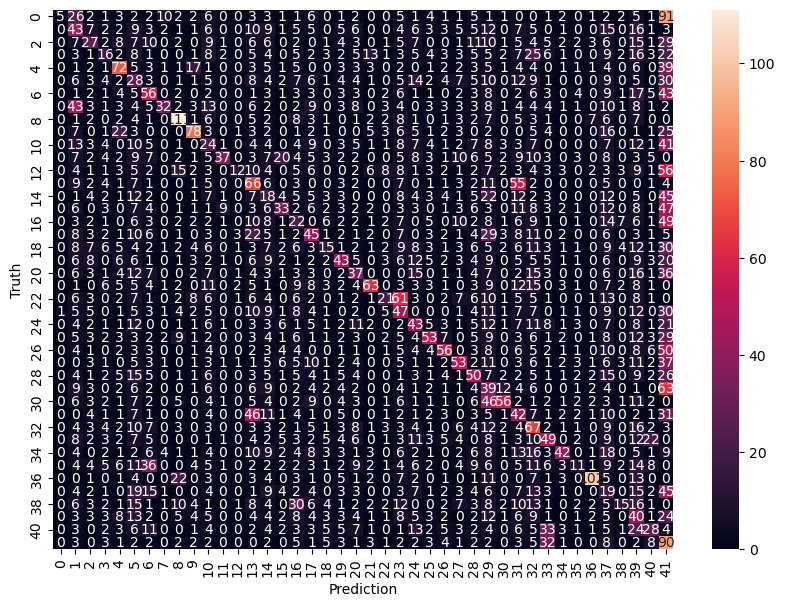

In [100]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel("Truth")